# Summary Statistics of all variables

### Reading and cleaning data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import auc

In [52]:
df = pd.read_csv('/Users/wingkaho/Desktop/merge_data_new.csv')

In [53]:
df

,Ward,Old Ward Code,Local Authority,ward_name,Geography,2010-14;Male;Life expectancy at birth,2010-14;Female;Life expectancy at birth,Median monthly houshold income,homes with good access to all four types of public open space%,Employment rate 2011 (16-64),well-being scores,percent_green,access_to_open_space
0,E05000026,00ABFX,Barking and Dagenham,Abbey,Ward,80.0,83.6,33920,0.3,60.3,7.789197,27.838313,70.70
1,E05000026,00ABFX,Barking and Dagenham,Abbey,Ward,80.0,83.6,33920,0.3,60.3,7.789197,27.838313,75.56
2,E05000026,00ABFX,Barking and Dagenham,Abbey,Ward,80.0,83.6,33920,0.3,60.3,7.789197,25.961439,70.70
3,E05000026,00ABFX,Barking and Dagenham,Abbey,Ward,80.0,83.6,33920,0.3,60.3,7.789197,25.961439,75.56
4,E05000027,00ABFY,Barking and Dagenham,Alibon,Ward,77.0,81.4,32470,0.0,63.1,7.553030,45.937133,8.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,E05000645,00BKGR,"Westminster, City of",Tachbrook,Ward,83.3,84.2,47340,0.0,75.2,8.006511,19.675524,90.84
717,E05000646,00BKGS,"Westminster, City of",Vincent Square,Ward,80.1,84.7,46550,0.0,69.0,8.006511,16.855863,92.56
718,E05000647,00BKGT,"Westminster, City of",Warwick,Ward,81.1,87.9,50250,32.9,73.8,8.006511,11.144458,3.78
719,E05000648,00BKGU,"Westminster, City of",Westbourne,Ward,75.3,80.7,32390,0.0,59.0,7.993658,29.441530,72.76


In [105]:
df.columns

Index(['Ward', 'Old Ward Code', 'Local Authority', 'ward_name', 'Geography',
       'male_life_expectancy', 'female_life_expectancy',
       'median_monthly_household_income', 'accessibility', 'employment_rate',
       'wellbeing', 'percent_green', 'access_to_open_space'],
      dtype='object')

In [103]:
df[df.access_to_open_space.isna()]

,Ward,Old Ward Code,Local Authority,ward_name,Geography,male_life_expectancy,female_life_expectancy,median_monthly_household_income,accessibility,employment_rate,wellbeing,percent_green,access_to_open_space


In [104]:
df.isnull().sum(axis=0).sort_values(ascending=False)[:12]

Ward                               0
Old Ward Code                      0
Local Authority                    0
ward_name                          0
Geography                          0
male_life_expectancy               0
female_life_expectancy             0
median_monthly_household_income    0
accessibility                      0
employment_rate                    0
wellbeing                          0
percent_green                      0
dtype: int64

In [56]:
df.dropna(inplace=True)


In [57]:
df[df.percent_green.isna()]

,Ward,Old Ward Code,Local Authority,ward_name,Geography,2010-14;Male;Life expectancy at birth,2010-14;Female;Life expectancy at birth,Median monthly houshold income,homes with good access to all four types of public open space%,Employment rate 2011 (16-64),well-being scores,percent_green,access_to_open_space


In [58]:
df[df.access_to_open_space.isna()]

,Ward,Old Ward Code,Local Authority,ward_name,Geography,2010-14;Male;Life expectancy at birth,2010-14;Female;Life expectancy at birth,Median monthly houshold income,homes with good access to all four types of public open space%,Employment rate 2011 (16-64),well-being scores,percent_green,access_to_open_space


In [59]:
df

,Ward,Old Ward Code,Local Authority,ward_name,Geography,2010-14;Male;Life expectancy at birth,2010-14;Female;Life expectancy at birth,Median monthly houshold income,homes with good access to all four types of public open space%,Employment rate 2011 (16-64),well-being scores,percent_green,access_to_open_space
0,E05000026,00ABFX,Barking and Dagenham,Abbey,Ward,80.0,83.6,33920,0.3,60.3,7.789197,27.838313,70.70
1,E05000026,00ABFX,Barking and Dagenham,Abbey,Ward,80.0,83.6,33920,0.3,60.3,7.789197,27.838313,75.56
2,E05000026,00ABFX,Barking and Dagenham,Abbey,Ward,80.0,83.6,33920,0.3,60.3,7.789197,25.961439,70.70
3,E05000026,00ABFX,Barking and Dagenham,Abbey,Ward,80.0,83.6,33920,0.3,60.3,7.789197,25.961439,75.56
4,E05000027,00ABFY,Barking and Dagenham,Alibon,Ward,77.0,81.4,32470,0.0,63.1,7.553030,45.937133,8.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,E05000645,00BKGR,"Westminster, City of",Tachbrook,Ward,83.3,84.2,47340,0.0,75.2,8.006511,19.675524,90.84
717,E05000646,00BKGS,"Westminster, City of",Vincent Square,Ward,80.1,84.7,46550,0.0,69.0,8.006511,16.855863,92.56
718,E05000647,00BKGT,"Westminster, City of",Warwick,Ward,81.1,87.9,50250,32.9,73.8,8.006511,11.144458,3.78
719,E05000648,00BKGU,"Westminster, City of",Westbourne,Ward,75.3,80.7,32390,0.0,59.0,7.993658,29.441530,72.76


In [60]:
df.describe()

,2010-14;Male;Life expectancy at birth,2010-14;Female;Life expectancy at birth,Median monthly houshold income,homes with good access to all four types of public open space%,Employment rate 2011 (16-64),well-being scores,percent_green,access_to_open_space
count,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000
mean,80.304739,84.521011,39488.783570,15.345340,69.862559,7.639812,42.082352,48.833460
std,2.513289,2.354248,7712.542797,23.686779,6.194605,0.214728,15.741666,26.916148
min,74.300000,77.700000,25090.000000,0.000000,48.700000,7.155185,1.588666,0.000000
25%,78.700000,82.900000,33890.000000,0.000000,65.600000,7.478364,30.724412,27.980000
50%,80.100000,84.400000,38130.000000,0.000000,70.400000,7.643298,41.699136,49.140000
75%,82.000000,86.100000,43800.000000,26.400000,74.500000,7.770077,51.896926,70.700000
max,91.000000,93.100000,88330.000000,95.900000,83.900000,8.423186,91.337776,100.000000


In [61]:
df.rename(columns = {'2010-14;Male;Life expectancy at birth':'male_life_expectancy',
                              '2010-14;Female;Life expectancy at birth':'female_life_expectancy',
                              'Median monthly houshold income': 'median_monthly_household_income', 'homes with good access to all four types of public open space% ': 'accessibility',
                              'Employment rate 2011 (16-64)':'employment_rate', 'well-being scores' : 'wellbeing'}, 
                   inplace = True)

In [62]:
df.columns

Index(['Ward', 'Old Ward Code', 'Local Authority', 'ward_name', 'Geography',
       'male_life_expectancy', 'female_life_expectancy',
       'median_monthly_household_income', 'accessibility', 'employment_rate',
       'wellbeing', 'percent_green', 'access_to_open_space'],
      dtype='object')

In [21]:
df.median_monthly_household_income

0      33920
1      33920
2      32470
3      33000
4      33920
       ...  
648    47340
649    46550
650    50250
651    32390
652    54970
Name: median_monthly_household_income, Length: 565, dtype: int64

In [127]:
df = df[['Ward', 'ward_name', 'Local Authority', 'male_life_expectancy', 'female_life_expectancy', 'median_monthly_household_income', 'employment_rate', 'wellbeing', 'percent_green', 'access_to_open_space']]

### Summary statistics

In [128]:
df.describe()

,male_life_expectancy,female_life_expectancy,median_monthly_household_income,employment_rate,wellbeing,percent_green,access_to_open_space
count,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000
mean,80.304739,84.521011,39488.783570,69.862559,7.639812,42.082352,48.833460
std,2.513289,2.354248,7712.542797,6.194605,0.214728,15.741666,26.916148
min,74.300000,77.700000,25090.000000,48.700000,7.155185,1.588666,0.000000
25%,78.700000,82.900000,33890.000000,65.600000,7.478364,30.724412,27.980000
50%,80.100000,84.400000,38130.000000,70.400000,7.643298,41.699136,49.140000
75%,82.000000,86.100000,43800.000000,74.500000,7.770077,51.896926,70.700000
max,91.000000,93.100000,88330.000000,83.900000,8.423186,91.337776,100.000000


### Histogram

Life expectancy males

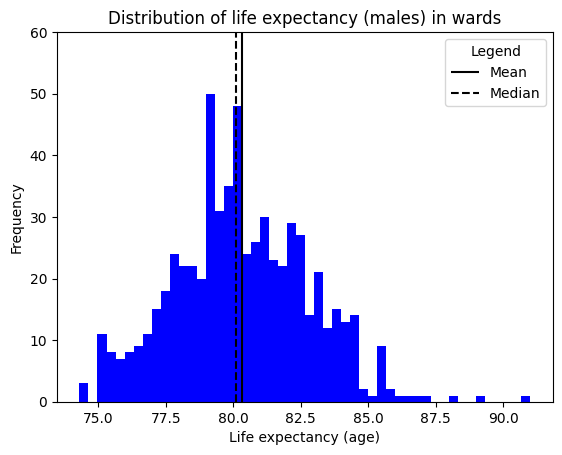

In [132]:
plt.hist(df['male_life_expectancy'], bins=50, color = 'blue', edgecolor='none')
plt.xlabel("Life expectancy (age)")
plt.ylabel("Frequency")
plt.vlines(df["male_life_expectancy"].mean(), 0, 60, linestyle="-", color="black", label="Mean")
plt.vlines(df["male_life_expectancy"].median(), 0, 60, linestyle="--", color="black", label="Median")
plt.legend(title="Legend")

plt.title("Distribution of life expectancy (males) in wards")
plt.ylim(0,60)

plt.show()

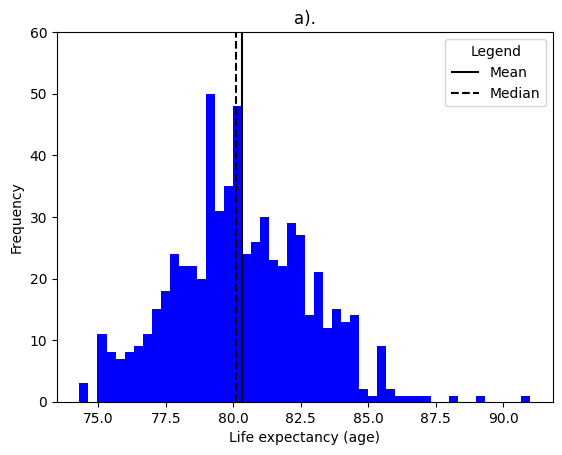

In [146]:
plt.hist(df['male_life_expectancy'], bins=50, color = 'blue', edgecolor='none')
plt.xlabel("Life expectancy (age)")
plt.ylabel("Frequency")
plt.vlines(df["male_life_expectancy"].mean(), 0, 60, linestyle="-", color="black", label="Mean")
plt.vlines(df["male_life_expectancy"].median(), 0, 60, linestyle="--", color="black", label="Median")
plt.legend(title="Legend")

plt.title("a).")
plt.ylim(0,60)

plt.show()

Life expectancy female

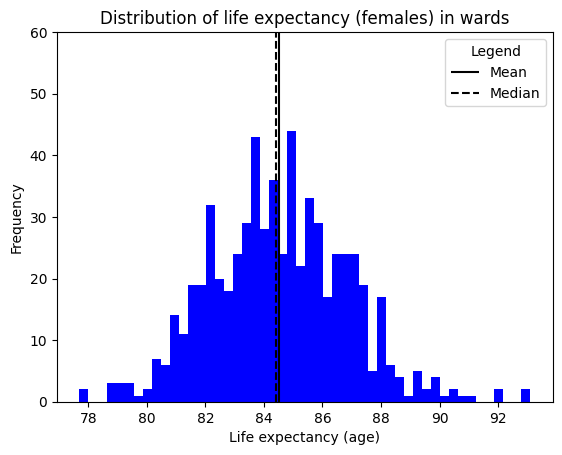

In [134]:
plt.hist(df['female_life_expectancy'], bins=50, color = 'blue', edgecolor='none')
plt.xlabel("Life expectancy (age)")
plt.ylabel("Frequency")
plt.vlines(df["female_life_expectancy"].mean(), 0, 60, linestyle="-", color="black", label="Mean")
plt.vlines(df["female_life_expectancy"].median(), 0, 60, linestyle="--", color="black", label="Median")
plt.legend(title="Legend")
plt.title("Distribution of life expectancy (females) in wards")
plt.ylim(0,60)

plt.show()

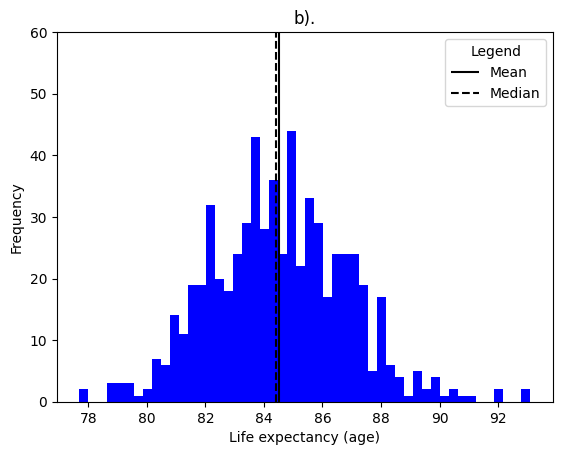

In [147]:
plt.hist(df['female_life_expectancy'], bins=50, color = 'blue', edgecolor='none')
plt.xlabel("Life expectancy (age)")
plt.ylabel("Frequency")
plt.vlines(df["female_life_expectancy"].mean(), 0, 60, linestyle="-", color="black", label="Mean")
plt.vlines(df["female_life_expectancy"].median(), 0, 60, linestyle="--", color="black", label="Median")
plt.legend(title="Legend")
plt.title("b).")
plt.ylim(0,60)

plt.show()

Median monthly household income

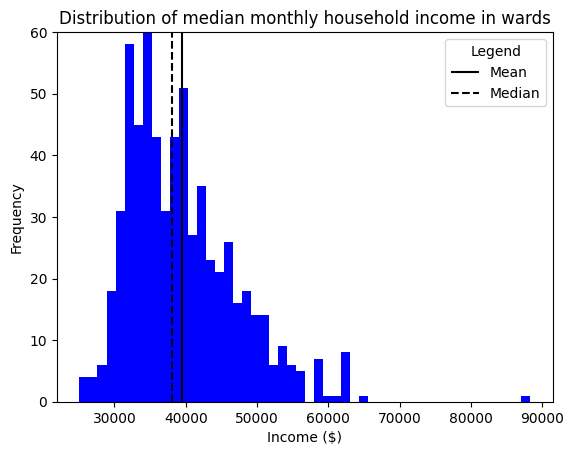

In [139]:
plt.hist(df['median_monthly_household_income'], bins=50, color = 'blue', edgecolor='none')
plt.xlabel("Income ($)")
plt.ylabel("Frequency")
plt.vlines(df["median_monthly_household_income"].mean(), 0, 60, linestyle="-", color="black", label="Mean")
plt.vlines(df["median_monthly_household_income"].median(), 0, 60, linestyle="--", color="black", label="Median")
plt.legend(title="Legend")
plt.title("Distribution of median monthly household income in wards")
plt.ylim(0,60)

plt.show()

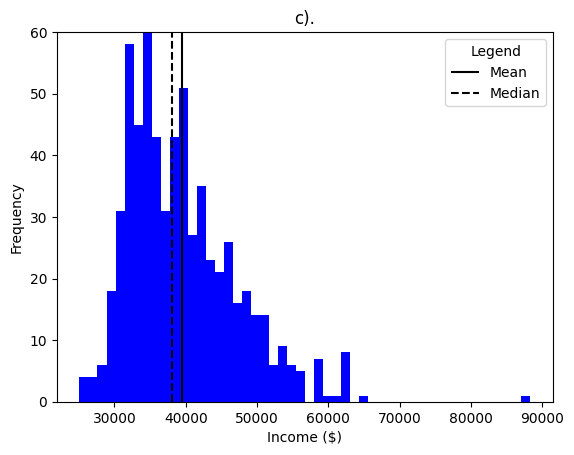

In [148]:
plt.hist(df['median_monthly_household_income'], bins=50, color = 'blue', edgecolor='none')
plt.xlabel("Income ($)")
plt.ylabel("Frequency")
plt.vlines(df["median_monthly_household_income"].mean(), 0, 60, linestyle="-", color="black", label="Mean")
plt.vlines(df["median_monthly_household_income"].median(), 0, 60, linestyle="--", color="black", label="Median")
plt.legend(title="Legend")
plt.title("c).")
plt.ylim(0,60)

plt.show()

Employment rate

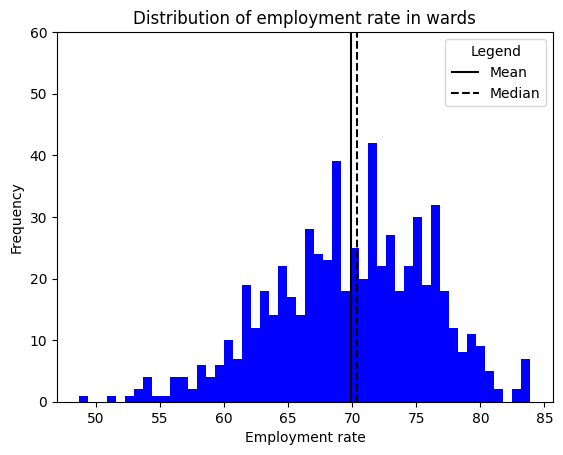

In [140]:
plt.hist(df['employment_rate'], bins=50, color = 'blue', edgecolor='none')
plt.xlabel("Employment rate")
plt.ylabel("Frequency")
plt.vlines(df["employment_rate"].mean(), 0, 60, linestyle="-", color="black", label="Mean")
plt.vlines(df["employment_rate"].median(), 0, 60, linestyle="--", color="black", label="Median")
plt.legend(title="Legend")
plt.title("Distribution of employment rate in wards")
plt.ylim(0,60)

plt.show()

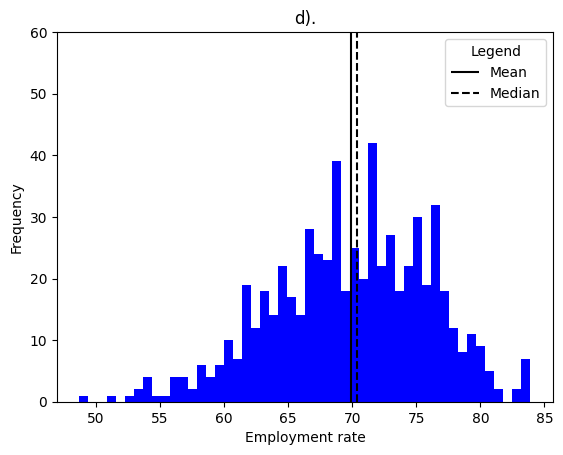

In [155]:
plt.hist(df['employment_rate'], bins=50, color = 'blue', edgecolor='none')
plt.xlabel("Employment rate")
plt.ylabel("Frequency")
plt.vlines(df["employment_rate"].mean(), 0, 60, linestyle="-", color="black", label="Mean")
plt.vlines(df["employment_rate"].median(), 0, 60, linestyle="--", color="black", label="Median")
plt.legend(title="Legend")
plt.title("d).")
plt.ylim(0,60)

plt.show()

Wellbeing

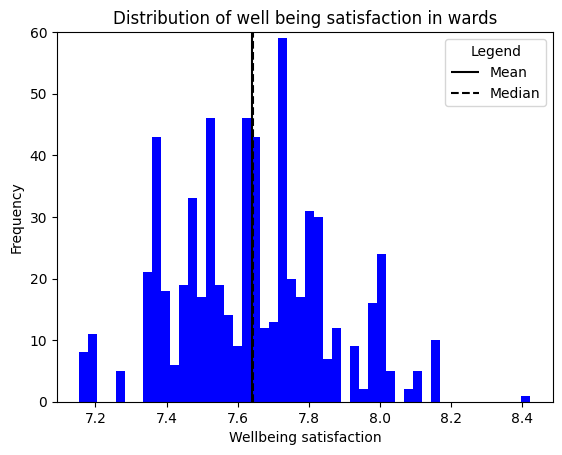

In [141]:
plt.hist(df['wellbeing'], bins=50, color = 'blue', edgecolor='none')
plt.xlabel("Wellbeing satisfaction")
plt.ylabel("Frequency")
plt.vlines(df["wellbeing"].mean(), 0, 60, linestyle="-", color="black", label="Mean")
plt.vlines(df["wellbeing"].median(), 0, 60, linestyle="--", color="black", label="Median")
plt.legend(title="Legend")
plt.title("Distribution of well being satisfaction in wards")
plt.ylim(0,60)

plt.show()

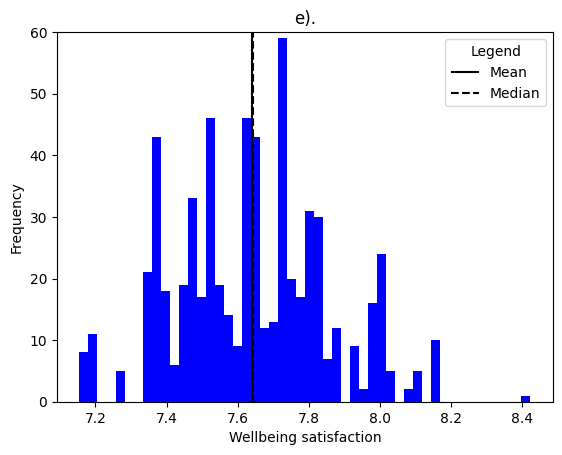

In [150]:
plt.hist(df['wellbeing'], bins=50, color = 'blue', edgecolor='none')
plt.xlabel("Wellbeing satisfaction")
plt.ylabel("Frequency")
plt.vlines(df["wellbeing"].mean(), 0, 60, linestyle="-", color="black", label="Mean")
plt.vlines(df["wellbeing"].median(), 0, 60, linestyle="--", color="black", label="Median")
plt.legend(title="Legend")
plt.title("e).")
plt.ylim(0,60)

plt.show()

Percent green

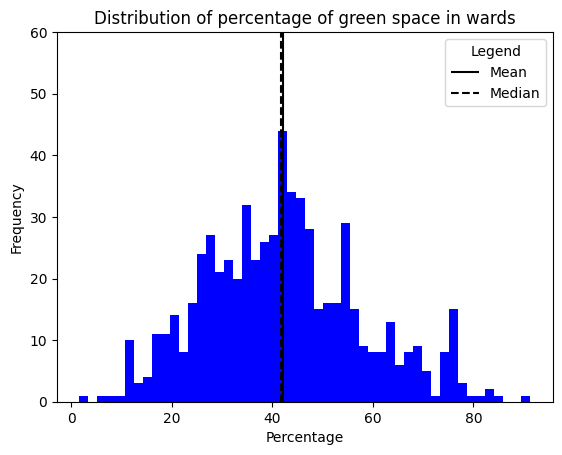

In [144]:
plt.hist(df['percent_green'], bins=50, color = 'blue', edgecolor='none')
plt.xlabel("Percentage")
plt.ylabel("Frequency")
plt.vlines(df["percent_green"].mean(), 0, 60, linestyle="-", color="black", label="Mean")
plt.vlines(df["percent_green"].median(), 0, 60, linestyle="--", color="black", label="Median")
plt.legend(title="Legend")
plt.title("Distribution of percentage of green space in wards")
plt.ylim(0,60)

plt.show()

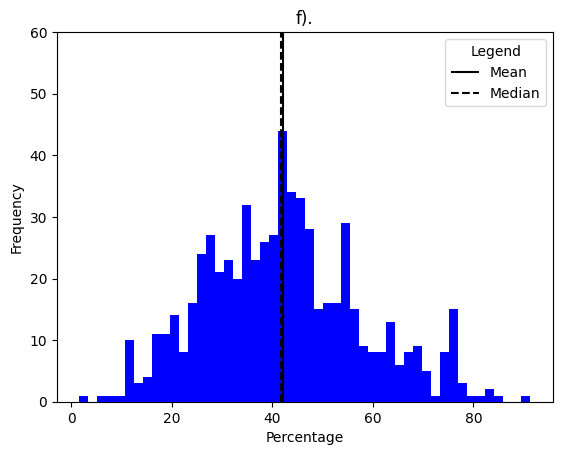

In [151]:
plt.hist(df['percent_green'], bins=50, color = 'blue', edgecolor='none')
plt.xlabel("Percentage")
plt.ylabel("Frequency")
plt.vlines(df["percent_green"].mean(), 0, 60, linestyle="-", color="black", label="Mean")
plt.vlines(df["percent_green"].median(), 0, 60, linestyle="--", color="black", label="Median")
plt.legend(title="Legend")
plt.title("f).")
plt.ylim(0,60)

plt.show()

Accessibility 

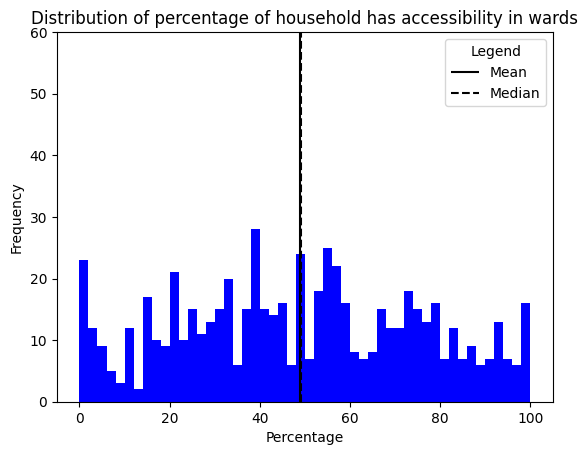

In [145]:
plt.hist(df['access_to_open_space'], bins=50, color = 'blue', edgecolor='none')
plt.xlabel("Percentage")
plt.ylabel("Frequency")
plt.vlines(df["access_to_open_space"].mean(), 0, 60, linestyle="-", color="black", label="Mean")
plt.vlines(df["access_to_open_space"].median(), 0, 60, linestyle="--", color="black", label="Median")
plt.legend(title="Legend")
plt.title("Distribution of percentage of household has accessibility in wards")
plt.ylim(0,60)

plt.show()

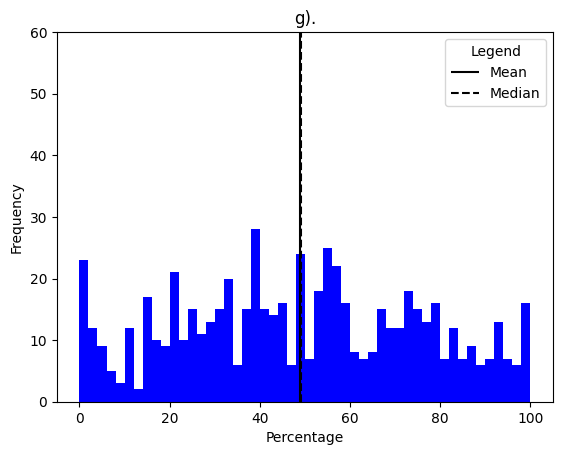

In [156]:
plt.hist(df['access_to_open_space'], bins=50, color = 'blue', edgecolor='none')
plt.xlabel("Percentage")
plt.ylabel("Frequency")
plt.vlines(df["access_to_open_space"].mean(), 0, 60, linestyle="-", color="black", label="Mean")
plt.vlines(df["access_to_open_space"].median(), 0, 60, linestyle="--", color="black", label="Median")
plt.legend(title="Legend")
plt.title("g).")
plt.ylim(0,60)

plt.show()